In [6]:
from PIL import Image
from pipeline import pipeline, segmentation_filter
from utils import segmentation_labels, utils
from models import dataset, config
from sklearn.model_selection import train_test_split
import random
import torchvision.transforms as T
import matplotlib.pyplot as plt
from palette_classification import color_processing

In [7]:
# fetch test dataset
n_classes = len(segmentation_labels.labels)
dataset_path = config.DATASET_PATH
img_paths, label_paths = dataset.get_paths(dataset_path, file_name=config.DATASET_INDEX_NAME)
_, X_test, _, Y_test = train_test_split(img_paths, label_paths, test_size=0.20, random_state=99, shuffle=True)

# define filters
segmentation_filter = segmentation_filter.SegmentationFilter('local')

# compose pipeline
pipeline = pipeline.Pipeline()
pipeline.add_filter(segmentation_filter)

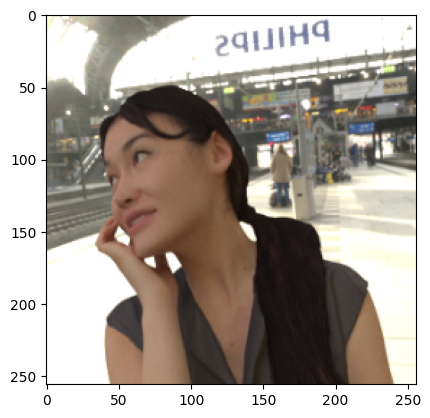

In [8]:
# take random image from test dataset
i = random.randint(0, len(X_test) - 1)
img = Image.open(X_test[i]).convert('RGB')
img

# just for plotting image
pil_to_tensor = T.Compose([T.PILToTensor()])
transforms = T.Compose([T.Resize((256, 256))])
img_transformed = transforms(pil_to_tensor(img) / 255)
plt.imshow(utils.from_DHW_to_HWD(img_transformed))

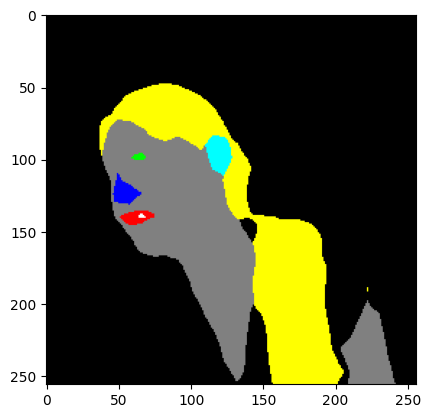

In [9]:
# show results   
masks = pipeline.execute(img).to('cpu')
plt.imshow(utils.from_DHW_to_HWD(color_processing.colorize_segmentation_masks(masks, segmentation_labels.labels)))